In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [47]:
# Step 1: Create Dataset
np.random.seed(42)
study_hours = np.random.uniform(0, 40, 100)  # Study hours per week
attendance = np.random.uniform(50, 100, 100)  # Attendance percentage
pass_status = (study_hours * 0.2 + attendance * 0.5 + np.random.normal(0, 10, 100)) > 50
pass_status = pass_status.astype(int)  # Convert boolean to 0/1

In [49]:
df = pd.DataFrame({'Study Hours': study_hours, 'Attendance': attendance, 'Pass': pass_status})

In [51]:
# Step 2: Data Exploration
print(df.info())
print(df.describe())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Study Hours  100 non-null    float64
 1   Attendance   100 non-null    float64
 2   Pass         100 non-null    int32  
dtypes: float64(2), int32(1)
memory usage: 2.1 KB
None
       Study Hours  Attendance        Pass
count   100.000000  100.000000  100.000000
mean     18.807230   74.891586    0.250000
std      11.899576   14.655563    0.435194
min       0.220885   50.347607    0.000000
25%       7.728030   62.100226    0.000000
50%      18.565698   75.281243    0.000000
75%      29.208125   88.309180    0.250000
max      39.475477   99.282523    1.000000
   Study Hours  Attendance  Pass
0    14.981605   51.571459     0
1    38.028572   81.820521     1
2    29.279758   65.717799     0
3    23.946339   75.428535     0
4     6.240746   95.378324     1


In [53]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())

Missing values:
Study Hours    0
Attendance     0
Pass           0
dtype: int64


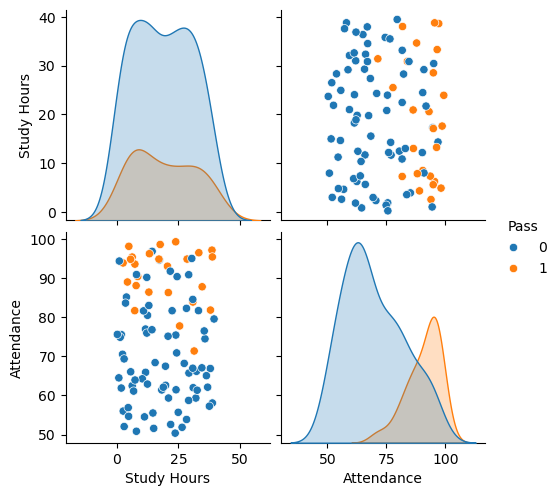

In [55]:
# Plot data distribution
sns.pairplot(df, hue='Pass')
plt.show()

In [57]:
# Step 3: Model Training
X = df[['Study Hours', 'Attendance']]
y = df['Pass']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [61]:
# Step 4: Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


In [63]:
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)

Accuracy: 0.90
Confusion Matrix:
 [[14  1]
 [ 1  4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        15
           1       0.80      0.80      0.80         5

    accuracy                           0.90        20
   macro avg       0.87      0.87      0.87        20
weighted avg       0.90      0.90      0.90        20



In [65]:
# Insights
coefficients = model.coef_[0]
print(f"Study Hours Coefficient: {coefficients[0]:.2f}")
print(f"Attendance Coefficient: {coefficients[1]:.2f}")

Study Hours Coefficient: 0.03
Attendance Coefficient: 0.16
